In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize

# Read the file path and label

In [2]:
#讀取路徑檔與Label
df_train =pd.read_csv('train_index.csv')
df_test = pd.read_csv('test_index.csv')

In [3]:
df_train.columns

Index(['file_path', 'label'], dtype='object')

In [4]:
df_test.columns

Index(['0'], dtype='object')

In [5]:
#將Label Mapping 成數字型態
class_map = {'Cherry':0, 'Banana':1, 'Apple':2}

In [6]:
df_train['label'] = df_train['label'].map(class_map)

In [7]:
#Assign圖片路徑、圖片標籤、測試的圖片標籤
train_path = df_train['file_path'].values
train_label = df_train['label'].values
test_path = df_test['0'].values

# Read the image

In [8]:
#建立一個空的numpy array, shape = (圖片數, 圖片寬度, 圖片高度)
train_image = np.empty((len(train_path),100,100))

In [9]:
#依照路徑讀取圖片
for idx, path in enumerate(train_path):
    train_image[idx] = imread(path, as_grey=True)

In [10]:
#確認training set 的維度
train_image.shape

(1474, 100, 100)

In [11]:
#將矩陣的數字轉為float 與標準化
train_image.astype('float32')
train_image /= 255

In [12]:
#測試集
test_image = np.empty((len(test_path),100,100))

In [13]:
#讀取測試集
for idx, path in enumerate(test_path):
    test_image[idx] = imread(path, as_grey=True)

In [14]:
#測試集的data 標準化
test_image /= 255

# Importing library

In [15]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
#很重要不加會error...
K.set_image_dim_ordering("th")

# Parameter setting

In [18]:
#各項參數設定
NB_EPOCH = 5
BATCH_SIZE = 32
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 100, 100 # input image dimensions
NB_CLASSES = 3 # number of outputs = number of digits
INPUT_SHAPE = (1,IMG_ROWS, IMG_COLS)

# Model building

In [17]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

In [19]:
#將訓練集轉成4個維度
x_train = train_image[:, np.newaxis, :, :]

In [20]:
#將Label 轉成one-hot 型態(Label 要先用label encoding 表示)
y_train = np_utils.to_categorical(train_label, NB_CLASSES)

In [21]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [22]:
#印出模型的結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 100, 100)      1300      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 100, 100)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 50)        62550     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 25, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31250)             0         
__________

# Training the data

In [23]:
#模型開始訓練
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 1179 samples, validate on 295 samples
Epoch 1/5
1179/1179 [==============================] - 112s 95ms/step - loss: 1.0578 - acc: 0.4360 - val_loss: 1.7989 - val_acc: 0.0000e+00
Epoch 2/5
1179/1179 [==============================] - 113s 96ms/step - loss: 0.9772 - acc: 0.7252 - val_loss: 1.8649 - val_acc: 0.0000e+00
Epoch 3/5
1179/1179 [==============================] - 138s 117ms/step - loss: 0.3855 - acc: 0.8906 - val_loss: 0.3787 - val_acc: 0.9593
Epoch 4/5
1179/1179 [==============================] - 152s 129ms/step - loss: 0.0559 - acc: 0.9966 - val_loss: 0.0673 - val_acc: 1.0000
Epoch 5/5
1179/1179 [==============================] - 152s 129ms/step - loss: 0.0151 - acc: 0.9992 - val_loss: 0.0334 - val_acc: 1.0000


In [24]:
#檢視訓練的過程
history.history

{'acc': [0.43596268027540586,
  0.7251908394924355,
  0.8905852418819457,
  0.996607294317218,
  0.9991518235793045],
 'loss': [1.0577630593273173,
  0.9772057829012397,
  0.38549463956461205,
  0.05585394590220985,
  0.015133579096506469],
 'val_acc': [0.0, 0.0, 0.9593220338983051, 1.0, 1.0],
 'val_loss': [1.7988879514952838,
  1.864893532607515,
  0.3786955784943144,
  0.06729979180430962,
  0.03339029049216691]}

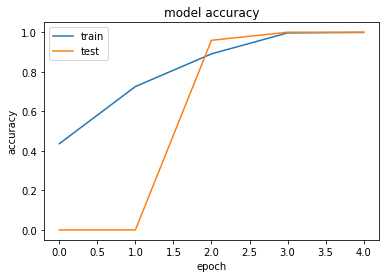

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

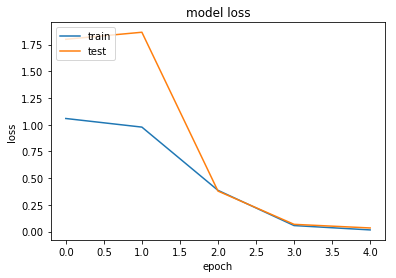

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Testing the model

In [27]:
x_test = test_image[:, np.newaxis, :, :]

In [28]:
model.predict_classes(x_test)

array([1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0])

/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


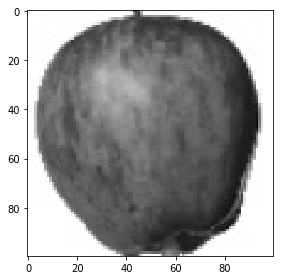

In [29]:
imshow(test_image[5]*255)